In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Used splitfolders tool to split dataset into training, validation and test directories.
IMAGE_SIZE = 96
train_dataG = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=20
    
)
train_generator = train_dataG.flow_from_directory(
        r'C:\Users\HP\Desktop\training\dataset\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 10578 images belonging to 10 classes.


In [8]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [9]:
classification = list(train_generator.class_indices.keys())
classification

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [14]:
for image_batch, label_batch in train_generator:
    print(len(label_batch))
    print(len(image_batch[0]))
    break

32
96


In [15]:
validation_dataG = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=20
    
)
validation_generator = validation_dataG.flow_from_directory(
        r'C:\Users\HP\Desktop\training\dataset\val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3020 images belonging to 10 classes.


In [16]:
test_dataG = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=20
    
)
test_generator = validation_dataG.flow_from_directory(
        r'C:\Users\HP\Desktop\training\dataset\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1520 images belonging to 10 classes.


In [20]:
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
cnn = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
cnn.build(input_shape=input_shape)

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [22]:
cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
#Total train_generator images // batch_size
10578//32

330

In [26]:
#Total validation_generator images // batch_size
3020//32

94

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
final = cnn.fit(
    train_generator,
    steps_per_epoch=330,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=94,
    verbose=1,
    epochs=10,
)

Epoch 1/10
330/330 [==============================] - 286s 868ms/step - loss: 1.4059 - accuracy: 0.5107 - val_loss: 0.8961 - val_accuracy: 0.6975
Epoch 2/10
330/330 [==============================] - 187s 566ms/step - loss: 0.7042 - accuracy: 0.7552 - val_loss: 0.6816 - val_accuracy: 0.7633
Epoch 3/10
330/330 [==============================] - 183s 554ms/step - loss: 0.5381 - accuracy: 0.8094 - val_loss: 0.5238 - val_accuracy: 0.8125
Epoch 4/10
330/330 [==============================] - 184s 558ms/step - loss: 0.4216 - accuracy: 0.8490 - val_loss: 0.5075 - val_accuracy: 0.8248
Epoch 5/10
330/330 [==============================] - 184s 558ms/step - loss: 0.3718 - accuracy: 0.8693 - val_loss: 0.3950 - val_accuracy: 0.8587
Epoch 6/10
330/330 [==============================] - 185s 559ms/step - loss: 0.3410 - accuracy: 0.8809 - val_loss: 0.3470 - val_accuracy: 0.8770
Epoch 7/10
330/330 [==============================] - 185s 559ms/step - loss: 0.2992 - accuracy: 0.8942 - val_loss: 0.2982 -

In [31]:
scores = cnn.evaluate(test_generator)

48/48 [==============================] - 21s 437ms/step - loss: 0.3858 - accuracy: 0.9026


In [32]:
# Scores is just a list containing loss and accuracy value
scores

[0.3858470618724823, 0.9026315808296204]

In [33]:
final

In [34]:
final.params

{'verbose': 1, 'epochs': 10, 'steps': 330}

In [35]:
acc = final.history['accuracy']
val_acc = final.history['val_accuracy']
loss = final.history['loss']
val_loss = final.history['val_loss']

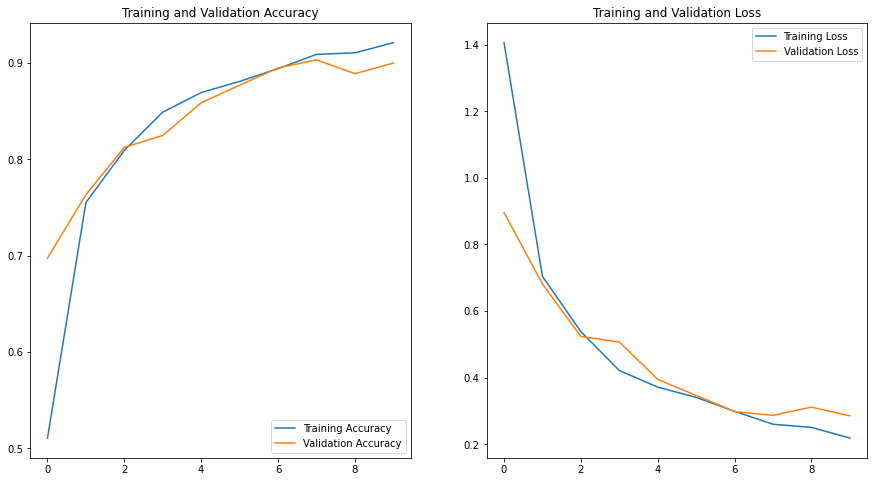

In [36]:
# Plotting the Accuracy and Loss Curves
plt.figure(figsize=(15, 8))
EPOCHS = 10
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

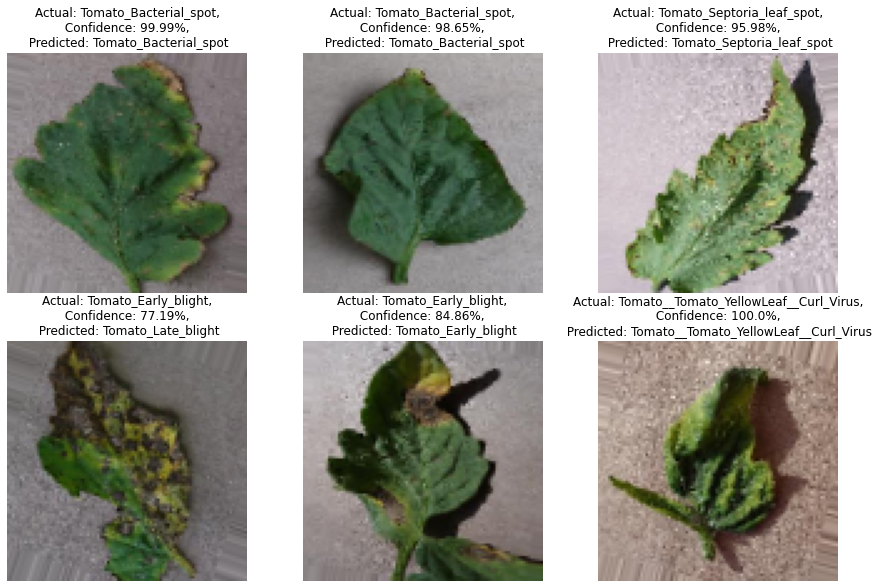

In [44]:
# Checking for sample images
import numpy as np
plt.figure(figsize=(15, 15))
for images_batch, labels_batch in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images_batch[i])
        
        img_array = tf.keras.preprocessing.image.img_to_array(images_batch[i])
        img_array = tf.expand_dims(img_array, 0)
        predictions = cnn.predict(img_array)
        predicted_class = classification[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        actual_class = classification[int(labels_batch[i])]
        
        plt.axis("off")
        plt.title(f"Actual: {actual_class},\n Confidence: {confidence}%, \n Predicted: {predicted_class}")
    break

In [45]:
# model.save("../tomato.h5")